# 1.0 Get Data Of Stock Market

* 本篇代码用来查询所有股票数据，所有导出的数据都将导出到stockdata文件夹内，方便管理查看。
* 平台api方面，国内用tushare，国外用的雅虎。
* 本篇代码也计划用来做数据清洗并且数据展示，处理好的文件也存在stockdata文件夹里面。

In [1]:
print("Hello,stock market");
import pandas as pd
from datetime import datetime
start_time = datetime.now()
## todo: calculating the time of import libraries
#先引入后面分析、可视化等可能用到的库
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt
#正常显示画图时出现的中文和负号
from pylab import mpl
import yfinance as yf
import matplotlib.pyplot as plt
# todo: solve chinese problem for plt
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False
print("Load Time: ",datetime.now()-start_time)

Hello,stock market
Load Time:  0:00:00.886455


## 1.1 use tushare api get data

In [2]:
# login tushare, use token
pro = ts.pro_api('f7b384108cbed0026a4dfa35835f75b0fb9d04673a067e8b75d8810f')


def getStockCompanyInformation(status='L', stock_code=''):
    """
    得到目前所有的股票公司信息
    :param status: 上市状态 L上市 D退市 P暂停上市，默认是L
    :param stock_code: TS股票代码
    :return:
    """
    if stock_code== '':
        rawStockCompanyDataInTushare = pro.stock_basic(exchange='', list_status=status, fields='ts_code,symbol,fullname,enname,name,area,industry,list_date')
    else:
        rawStockCompanyDataInTushare = pro.stock_basic(ts_code=stock_code, exchange='', list_status=status, fields='ts_code,symbol,fullname,enname,name,area,industry,list_date')
    return rawStockCompanyDataInTushare


# 拉取数据
def getDailyStockData(stock_code="",start="20180101",end="20230101"):
    """
    拉取股票日结交易信息，时间段默认 2018-1-1 到 2022-1-1，注意：该函数单次只能查询6000条记录。
    :param stock_code: 股票代码，默认为空，输入为空的时候，拉取这段时期所有股票的交易消息；若不为空，拉去这只股票这段时间的交易消息
    :param start: 开始日期
    :param end: 结束日期
    :return:
    """
    rawDailyDataInTushare = pro.daily(**{
        "ts_code": stock_code,
        "trade_date": "",
        "start_date": start,
        "end_date": end,
        "offset": "",
        "limit": "",
    }, fields=[
        "ts_code",
        "trade_date",
        "open",
        "high",
        "low",
        "close",
        "pre_close",
        "change",
        "pct_chg",
        "vol",
        "amount"
    ])
    return rawDailyDataInTushare


In [3]:
rawCompanyDataInTushare=getStockCompanyInformation()
print("The shape of the data frame: {}".format(rawCompanyDataInTushare.shape))
print("The types in the data frame {}".format(rawCompanyDataInTushare.dtypes))
rawCompanyDataInTushare

The shape of the data frame: (5166, 8)
The types in the data frame ts_code      object
symbol       object
name         object
area         object
industry     object
fullname     object
enname       object
list_date    object
dtype: object


,ts_code,symbol,name,area,industry,fullname,enname,list_date
0,000001.SZ,000001,平安银行,深圳,银行,平安银行股份有限公司,"Ping An Bank Co., Ltd.",19910403
1,000002.SZ,000002,万科A,深圳,全国地产,万科企业股份有限公司,"China Vanke Co.,Ltd.",19910129
2,000004.SZ,000004,ST国华,深圳,软件服务,深圳国华网安科技股份有限公司,Shenzhen Guohua Network Security Technology Co...,19910114
3,000005.SZ,000005,ST星源,深圳,环境保护,深圳世纪星源股份有限公司,Shenzhen Fountain Corporation,19901210
4,000006.SZ,000006,深振业A,深圳,区域地产,深圳市振业(集团)股份有限公司,"Shenzhen Zhenye(Group) Co., Ltd",19920427
...,...,...,...,...,...,...,...,...
5161,873305.BJ,873305,九菱科技,None,None,荆州九菱科技股份有限公司,"Jingzhou Julin Science And Technology Co.,Ltd",20221221
5162,873339.BJ,873339,恒太照明,None,None,江苏恒太照明股份有限公司,"Jiangsu Ever-Tie Lighting Co., Ltd",20221117
5163,873527.BJ,873527,夜光明,None,None,浙江夜光明光电科技股份有限公司,"Zhejiang Ygm Technology Co.,Ltd",20221027
5164,873593.BJ,873593,鼎智科技,None,None,江苏鼎智智能控制科技股份有限公司,Jiangsu DINGS Intelligent Control Technology C...,20230413


In [4]:
rawDailyDataInTushare=getDailyStockData()
print("The shape of the data frame: {}".format(rawDailyDataInTushare.shape))
print("The types in the data frame {}".format(rawDailyDataInTushare.dtypes))

rawDailyDataInTushare

The shape of the data frame: (6000, 11)
The types in the data frame ts_code        object
trade_date     object
open          float64
high          float64
low           float64
close         float64
pre_close     float64
change        float64
pct_chg       float64
vol           float64
amount        float64
dtype: object


,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,002198.SZ,20221230,6.39,6.57,6.33,6.52,6.40,0.12,1.8750,101579.12,65646.164
1,002199.SZ,20221230,6.36,6.43,6.28,6.39,6.29,0.10,1.5898,38684.00,24640.014
2,002194.SZ,20221230,9.13,9.26,9.07,9.21,9.10,0.11,1.2088,101101.41,92895.425
3,002181.SZ,20221230,5.28,5.52,5.28,5.46,5.31,0.15,2.8249,547665.70,297495.407
4,002195.SZ,20221230,1.99,2.02,1.98,2.01,1.98,0.03,1.5152,444728.72,89088.620
...,...,...,...,...,...,...,...,...,...,...,...
5995,300185.SZ,20221229,2.43,2.43,2.38,2.39,2.43,-0.04,-1.6461,169697.00,40744.559
5996,002212.SZ,20221229,9.51,9.93,9.48,9.85,9.59,0.26,2.7112,166568.42,163068.690
5997,002213.SZ,20221229,16.37,16.37,15.61,15.68,14.88,0.80,5.3763,238641.86,386408.221
5998,002397.SZ,20221229,4.54,4.67,4.51,4.54,4.60,-0.06,-1.3043,127870.79,58483.435


## 1.2 use yfinance (雅虎非官方API) api get stock data

In [5]:
data = yf.download(tickers=['AMD'],start='2018-01-1',end='2023-01-01')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,10.420000,11.020000,10.340000,10.980000,10.980000,44146300
2018-01-03,11.610000,12.140000,11.360000,11.550000,11.550000,154066700
2018-01-04,12.100000,12.430000,11.970000,12.120000,12.120000,109503000
2018-01-05,12.190000,12.220000,11.660000,11.880000,11.880000,63808900
2018-01-08,12.010000,12.300000,11.850000,12.280000,12.280000,63346000
...,...,...,...,...,...,...
2022-12-23,63.110001,64.660004,62.720001,64.519997,64.519997,45923000
2022-12-27,63.869999,64.279999,62.970001,63.270000,63.270000,36086000
2022-12-28,62.540001,63.540001,61.959999,62.570000,62.570000,39526500


[*********************100%***********************]  1 of 1 completed


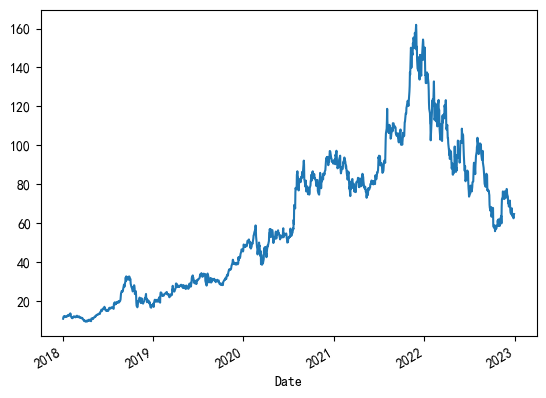

In [6]:
data = yf.download(['AMD'],'2018-01-01','2023-01-01')
data["Close"].plot()
plt.show()

In [7]:
rawDailyDataInTushare.to_csv('stockData/file2.csv', header=rawDailyDataInTushare.head, index=False)